In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
import torch

#torch.set_default_device('cuda')
#torch.cuda.set_device('cuda:1')
#print(torch.get_default_device())

import fit.sine_pde_eps as T
import numpy as n0

from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

%matplotlib inline
torch.set_printoptions(precision=4, linewidth=500, sci_mode=True)

In [ ]:
T.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]

  | Name  | Type | Params
-------------------------------
0 | model | Sine | 3.3 M 
-------------------------------
3.3 M     Trainable params
0         Non-trainable params
3.3 M     Total params
13.133    Total estimated model params size (MB)


Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s] 

OutOfMemoryError: CUDA out of memory. Tried to allocate 200.00 MiB. GPU 0 has a total capacity of 10.91 GiB of which 120.12 MiB is free. Process 2458714 has 2.12 GiB memory in use. Process 2462662 has 2.12 GiB memory in use. Process 2465510 has 2.12 GiB memory in use. Process 2482515 has 2.12 GiB memory in use. Including non-PyTorch memory, this process has 2.23 GiB memory in use. Of the allocated memory 1.87 GiB is allocated by PyTorch, and 136.30 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

: 

In [3]:
end = T.method.model.end
coord_dims = T.method.model.coord_dims
#_t = np.linspace(0, end, coord_dims[0])
target = T.dataset.y
damp = T.dataset.damp

In [4]:
T.method.model.coeffs.shape

torch.Size([1, 1, 6])

In [10]:
damp

array([[0.53526143, 0.5565612 , 0.57720502, ..., 0.57720502, 0.5565612 ,
        0.53526143],
       [0.5565612 , 0.57870855, 0.60017386, ..., 0.60017386, 0.57870855,
        0.5565612 ],
       [0.57720502, 0.60017386, 0.62243535, ..., 0.62243535, 0.60017386,
        0.57720502],
       ...,
       [0.57720502, 0.60017386, 0.62243535, ..., 0.62243535, 0.60017386,
        0.57720502],
       [0.5565612 , 0.57870855, 0.60017386, ..., 0.60017386, 0.57870855,
        0.5565612 ],
       [0.53526143, 0.5565612 , 0.57720502, ..., 0.57720502, 0.5565612 ,
        0.53526143]])

In [4]:
target.shape

torch.Size([32, 32])

In [4]:
func_list = T.method.func_list
y_list = T.method.y_list
#n_iter =500

In [6]:
(func_list[0].shape)

(1, 1, 1024)

In [7]:
t = np.linspace(0, end, coord_dims[0])
x = np.linspace(0, 10, coord_dims[1])

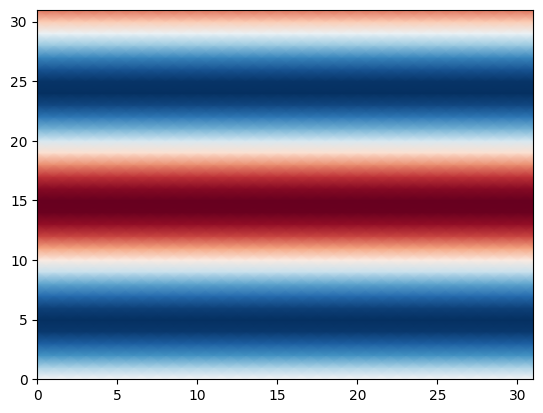

In [8]:
#plot = plt.pcolormesh(t, x, target, cmap='RdBu', shading='flat')
#plot = plt.pcolormesh(t, x, target, cmap='RdBu')
plot = plt.pcolormesh(target, cmap='RdBu', shading='gouraud')
#plot = plt.pcolormesh(damp, cmap='RdBu', shading='gouraud')
#plot = plt.pcolormesh(func_list[-1].reshape((32,32)), cmap='RdBu', shading='gouraud')

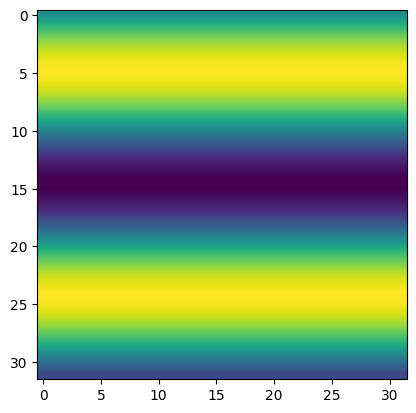

In [9]:
im = plt.imshow(target, interpolation='bilinear')

In [10]:
plt.show()

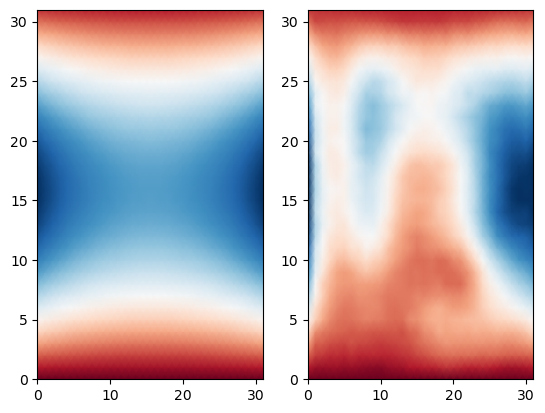

In [5]:
fig, ax = plt.subplots(1,2)
cax0 = ax[0].pcolormesh(y_list[-1].reshape(*coord_dims), cmap='RdBu', shading='gouraud')
cax1 = ax[1].pcolormesh(func_list[-1].reshape(*coord_dims), cmap='RdBu', shading='gouraud')

def animate(i):
   cax0.set_array(y_list[i].reshape(*coord_dims).flatten())
   cax1.set_array(func_list[i].reshape(*coord_dims).flatten())

anim = FuncAnimation(fig, animate, interval=100, frames=50)
HTML(anim.to_html5_video())

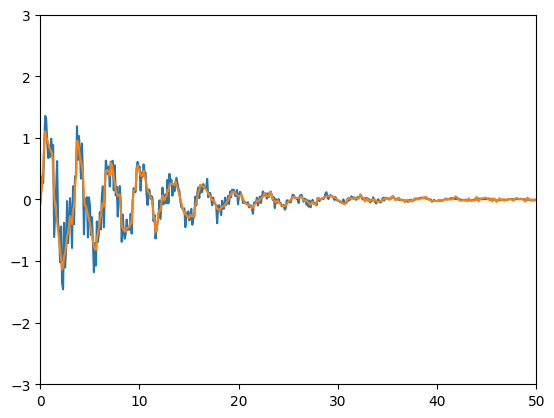

In [5]:

fig, ax = plt.subplots(1,1)
ax.set_xlim((0,end))
ax.set_ylim((-3,3))

line1, = ax.plot([], [])
line2, = ax.plot([], [])


def animate(t):
    line1.set_data(_y,y_list[2*t])
    line2.set_data(_y,func_list[2*t])
    return line1,
anim = FuncAnimation(fig, animate, frames=250, interval=20, blit=True)

HTML(anim.to_html5_video())